In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
file_path = "D:\\DEBADES SIR;S PAPERS\\Slowly rotating neutron star\\SLy.txt"

In [3]:
sly=np.genfromtxt(file_path,delimiter='')

rhos=sly[:,2]*(7.4237*(10**(-19))) # in km^-2
Ps=sly[:,3]*(8.2601*(10**(-40)))   # in km^-2

In [4]:
print(rhos)

[3.34808870e-17 1.57382440e-16 8.53725500e-16 7.75034280e-15
 1.94649414e-14 4.88999119e-14 1.22787998e-13 3.08528972e-13
 7.75034280e-13 1.94649414e-12 4.89073356e-12 6.15647441e-12
 1.22862235e-11 2.45130574e-11 4.89370304e-11 9.76216550e-11
 1.94872125e-10 2.45353285e-10 3.88927643e-10 6.16389811e-10
 7.76519020e-10 1.19224622e-09 1.88933165e-09 3.09271342e-09
 4.90409622e-09 5.96197347e-09 7.50536070e-09 9.79186030e-09
 1.23307657e-08 1.55229567e-08 1.88042321e-08 2.46095655e-08
 3.09865238e-08 3.45350524e-08 4.71182239e-08 6.26857228e-08
 8.16607000e-08 1.04525696e-07 1.31696438e-07 1.63841059e-07
 2.01479218e-07 2.09719525e-07 2.18256780e-07 2.27016746e-07
 2.36073660e-07 2.45353285e-07 2.54929858e-07 2.58047812e-07
 2.58418997e-07 2.59458315e-07 2.68144044e-07 2.76904010e-07
 2.86926005e-07 2.98135792e-07 3.10310660e-07 3.28127540e-07
 3.79202596e-07 4.38889144e-07 5.06444814e-07 5.81572658e-07
 6.63901491e-07 7.53505550e-07 9.52460710e-07 1.56937018e-06
 2.35850949e-06 3.328044

In [5]:
print(Ps)

[1.40421700e-25 4.80737820e-24 1.56941900e-22 8.04864144e-21
 4.10361768e-20 2.00803031e-19 9.50737510e-19 4.34976866e-18
 1.91469118e-17 8.05772755e-17 3.23052511e-16 4.34398659e-16
 1.18532435e-15 3.16609633e-15 8.30966060e-15 2.15093004e-14
 5.51444276e-14 7.21767538e-14 1.34557029e-13 2.50198429e-13
 3.41059529e-13 5.66642860e-13 1.05068472e-12 1.94607956e-12
 3.60305562e-12 4.67686862e-12 6.36192902e-12 8.65658480e-12
 1.17706425e-11 1.60080738e-11 2.06750303e-11 2.81173804e-11
 3.82277428e-11 4.43319567e-11 6.53621713e-11 9.30913270e-11
 1.28940161e-10 1.74205509e-10 2.30456790e-10 2.99428625e-10
 3.82855635e-10 4.01358259e-10 4.20686893e-10 4.40593734e-10
 4.61243984e-10 4.82637643e-10 5.04609509e-10 5.11878397e-10
 5.12787008e-10 5.13365215e-10 5.25094557e-10 5.34263268e-10
 5.43597181e-10 5.53426700e-10 5.63586623e-10 5.77793995e-10
 6.16864268e-10 6.62047015e-10 7.14003044e-10 7.73723567e-10
 8.41704190e-10 9.19349130e-10 1.10437537e-09 1.78005155e-09
 2.83073627e-09 4.351420

In [6]:
cPs=CubicSpline(rhos,Ps) # Pressure is a function of density
crhos=CubicSpline(Ps,rhos) # Density is a function of pressure

In [23]:
def f(x):
    r=x[0]
    m=x[1]
    P=x[2]
    
    rho=crhos(P)
    
    dr_dr=1
    dm_dr=4*np.pi*(r**2)*rho
    dP_dr=-((m*rho)/(r**2))*(1+(P/(rho)))*(1+((4*np.pi*P*(r**3))/(m)))*((1-((2*m)/(r)))**(-1))
    
    return np.array([dr_dr,dm_dr,dP_dr])
print(rho)

[0.000185   0.0001887  0.0001924  0.0001961  0.0001998  0.0002035
 0.0002072  0.0002109  0.0002146  0.0002183  0.000222   0.0002257
 0.0002294  0.0002331  0.0002368  0.0002405  0.0002442  0.0002479
 0.0002516  0.0002553  0.000259   0.0002627  0.0002664  0.0002701
 0.0002738  0.0002775  0.0002812  0.0002849  0.0002886  0.0002923
 0.000296   0.0002997  0.0003034  0.0003071  0.0003108  0.0003145
 0.0003182  0.0003219  0.0003256  0.0003293  0.000333   0.0003367
 0.0003404  0.0003441  0.0003478  0.0003515  0.0003552  0.0003589
 0.0003626  0.0003663  0.00037    0.0003737  0.0003774  0.0003811
 0.0003848  0.0003885  0.0003922  0.0003959  0.0003996  0.0004033
 0.000407   0.0004107  0.0004144  0.0004181  0.0004218  0.0004255
 0.0004292  0.0004329  0.0004366  0.0004403  0.000444   0.0004477
 0.0004514  0.0004551  0.0004588  0.0004625  0.0004662  0.0004699
 0.0004736  0.0004773  0.000481   0.0004847  0.0004884  0.0004921
 0.0004958  0.0004995  0.0005032  0.0005069  0.0005106  0.0005143
 0.000518 

In [22]:
print(rho)

[0.000185   0.0001887  0.0001924  0.0001961  0.0001998  0.0002035
 0.0002072  0.0002109  0.0002146  0.0002183  0.000222   0.0002257
 0.0002294  0.0002331  0.0002368  0.0002405  0.0002442  0.0002479
 0.0002516  0.0002553  0.000259   0.0002627  0.0002664  0.0002701
 0.0002738  0.0002775  0.0002812  0.0002849  0.0002886  0.0002923
 0.000296   0.0002997  0.0003034  0.0003071  0.0003108  0.0003145
 0.0003182  0.0003219  0.0003256  0.0003293  0.000333   0.0003367
 0.0003404  0.0003441  0.0003478  0.0003515  0.0003552  0.0003589
 0.0003626  0.0003663  0.00037    0.0003737  0.0003774  0.0003811
 0.0003848  0.0003885  0.0003922  0.0003959  0.0003996  0.0004033
 0.000407   0.0004107  0.0004144  0.0004181  0.0004218  0.0004255
 0.0004292  0.0004329  0.0004366  0.0004403  0.000444   0.0004477
 0.0004514  0.0004551  0.0004588  0.0004625  0.0004662  0.0004699
 0.0004736  0.0004773  0.000481   0.0004847  0.0004884  0.0004921
 0.0004958  0.0004995  0.0005032  0.0005069  0.0005106  0.0005143
 0.000518 

In [11]:
def ns_solve(rho_c):
    
    h=0.005 # in km
    
    P_c=cPs(rho_c)
    
    X=np.zeros([3,80000])
    
    X[:,0]=np.array([0.005,(7.4237*(10**(-34))),P_c])
    
    
    for i in range(1,80000):
        
        k1=f(X[:,i-1])
        k2=f(X[:,i-1]+k1*0.5*h)
        k3=f(X[:,i-1]+k2*0.5*h)
        k4=f(X[:,i-1]+k3*h)
        
        X[:,i]=X[:,i-1]+ (h*(k1+2*k2+2*k3+k4))/6
        
        
        if((X[2,i]/P_c)<1e-10):
            break
            
    return X[:,i-1]

In [24]:
rho=np.arange(1.85e-4,7.4237e-4,0.37e-5)
rho=np.append(rho,np.arange(7.4237e-4,29.69e-4,3.71e-5))

res_s=np.zeros([3,len(rho)])

In [13]:
for i in range(len(rho)):
    
    res_s[:,i]=ns_solve(rho[i])
    
R_s=res_s[0,]
M_s=res_s[1,]/1.4766

In [14]:
print(R_s)

[21.52  20.59  19.78  19.065 18.43  17.865 17.365 16.91  16.505 16.135
 15.8   15.5   15.22  14.97  14.74  14.525 14.33  14.15  13.985 13.835
 13.695 13.565 13.445 13.335 13.23  13.135 13.05  12.97  12.89  12.82
 12.755 12.695 12.64  12.585 12.54  12.49  12.45  12.41  12.375 12.34
 12.305 12.275 12.245 12.22  12.195 12.175 12.15  12.13  12.115 12.095
 12.08  12.065 12.05  12.035 12.02  12.01  12.    11.99  11.98  11.97
 11.96  11.955 11.945 11.94  11.93  11.925 11.92  11.915 11.91  11.905
 11.9   11.895 11.89  11.89  11.885 11.88  11.875 11.875 11.87  11.87
 11.865 11.865 11.86  11.86  11.855 11.855 11.85  11.85  11.845 11.845
 11.84  11.84  11.84  11.835 11.835 11.83  11.83  11.83  11.825 11.825
 11.82  11.82  11.82  11.815 11.815 11.81  11.81  11.805 11.805 11.805
 11.8   11.8   11.795 11.795 11.79  11.79  11.785 11.785 11.78  11.78
 11.775 11.775 11.77  11.765 11.765 11.76  11.76  11.755 11.755 11.75
 11.745 11.745 11.74  11.735 11.735 11.73  11.725 11.725 11.72  11.715
 11.715 11.7

In [15]:
print(M_s)

[0.14152738 0.14636278 0.15136346 0.15652412 0.16184012 0.16730779
 0.17292432 0.17868771 0.18459671 0.1906507  0.19684959 0.20319367
 0.20968349 0.2163197  0.22310282 0.23003308 0.23711018 0.244333
 0.25169932 0.2592055  0.26684594 0.27461429 0.28250463 0.29051153
 0.29863    0.30685547 0.31518376 0.32361105 0.33213381 0.34074879
 0.34945291 0.35824329 0.36711711 0.3760716  0.38510397 0.39421132
 0.4033906  0.4126385  0.42195146 0.43132606 0.44075915 0.45024782
 0.45978938 0.4693813  0.47902124 0.48870695 0.49843631 0.50820724
 0.51801769 0.52786562 0.53774896 0.54766554 0.55761313 0.56758933
 0.57759158 0.58761709 0.59766274 0.60772542 0.6178022  0.62789035
 0.63798729 0.64809059 0.65819798 0.66830728 0.67841645 0.68852353
 0.69862665 0.70872398 0.71881379 0.72889433 0.73896393 0.74902091
 0.75906357 0.76909023 0.77909909 0.78908829 0.79905601 0.80900059
 0.81892044 0.82881409 0.83868012 0.84851722 0.85832413 0.86809965
 0.87784265 0.88755202 0.89722671 0.90686568 0.91646793 0.926032

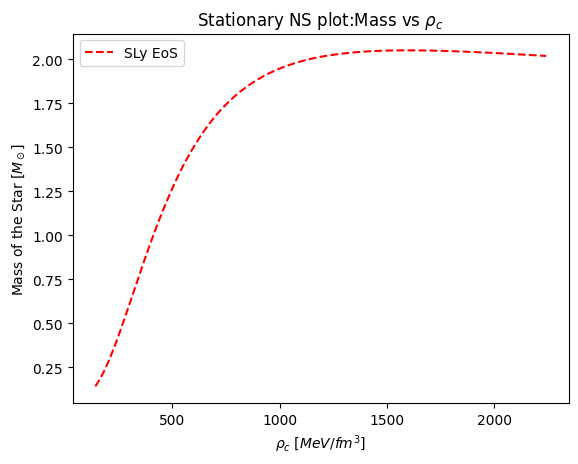

In [16]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Mass vs $\rho_c$")
ax.set_xlabel(r"$\rho_c$ [$MeV/fm^3$]")
ax.set_ylabel(r"Mass of the Star [$M_\odot$]")
plt.plot(rho/(1.3234*(10**(-6))),M_s,"r--",label="SLy EoS")

plt.legend(loc="best")
plt.show()


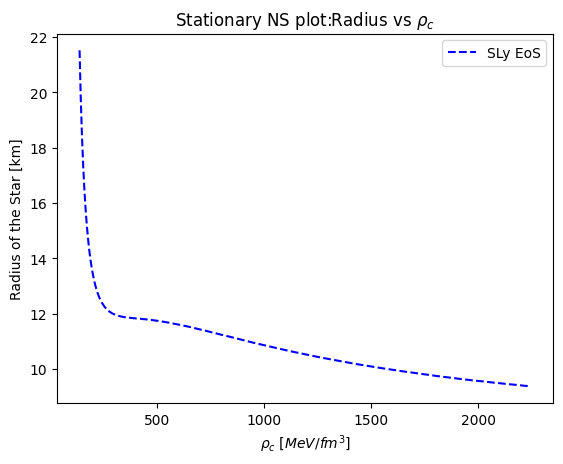

In [17]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Radius vs $\rho_c$")
ax.set_xlabel(r"$\rho_c$ [$MeV/fm^3$]")
ax.set_ylabel(r"Radius of the Star [km]")
plt.plot(rho/(1.3234*(10**(-6))),R_s,"b--",label="SLy EoS")

plt.legend(loc="best")
plt.show()

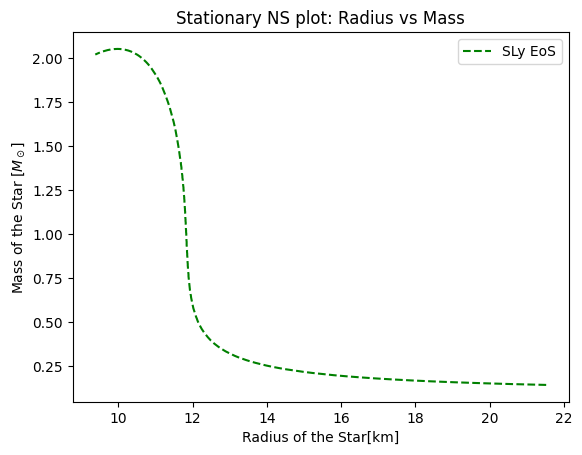

In [18]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot: Radius vs Mass")
ax.set_xlabel(r"Radius of the Star[km]")
ax.set_ylabel(r"Mass of the Star [$M_\odot$]")
plt.plot(R_s,M_s,"g--",label="SLy EoS")

plt.legend(loc="best")
plt.show()